In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [72]:
aero_data = {'species' : ['SO4', 'NO3', 'Cl', 'NH4', 'MSA', 'ARO1', 'ARO2', 'ALK1', 'OLE1', 'API1', 'API2', 'LIM1', 'LIM2', 'CO3', 'Na', 'Ca ', 'OIN', 'OC', 'BC', 'H2O'],
             'density' : [1800, 1800, 2200, 1800, 1800, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 2600, 2200, 2600, 2600, 1000, 1800, 1000],
             'ions' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             'molec_weight' : [96, 62, 35.5, 18, 95, 150,150, 140, 140, 184, 184, 200, 200, 60, 23, 40, 1, 1, 1, 18],
             'kappa' : [0.65, 0.65, 0.53, 0.65, 0.53, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.53, 0.53, 0.53, 0.1, 0.001, 0, 0]}
aero_file=pd.DataFrame(aero_data)

species = aero_file['species']
density = aero_file['density']
ions = aero_file['ions']
molec_weight = aero_file['molec_weight']
kappa = aero_file['kappa']
sgm_w = 72 
sgm_org = 40 
delta_min = 0.16 * 1e-9
univ_gas_const = 8.314472     #kg⋅m2⋅s−2⋅K−1⋅mol−1
water_density = 1e3           #kg/m3
water_molec_weight = 18e-3    #kg/mol
temp = 290                    #Kelvin

Text(0.0, 1.0, '$\\sigma = 0.072\\ J/m^2$')

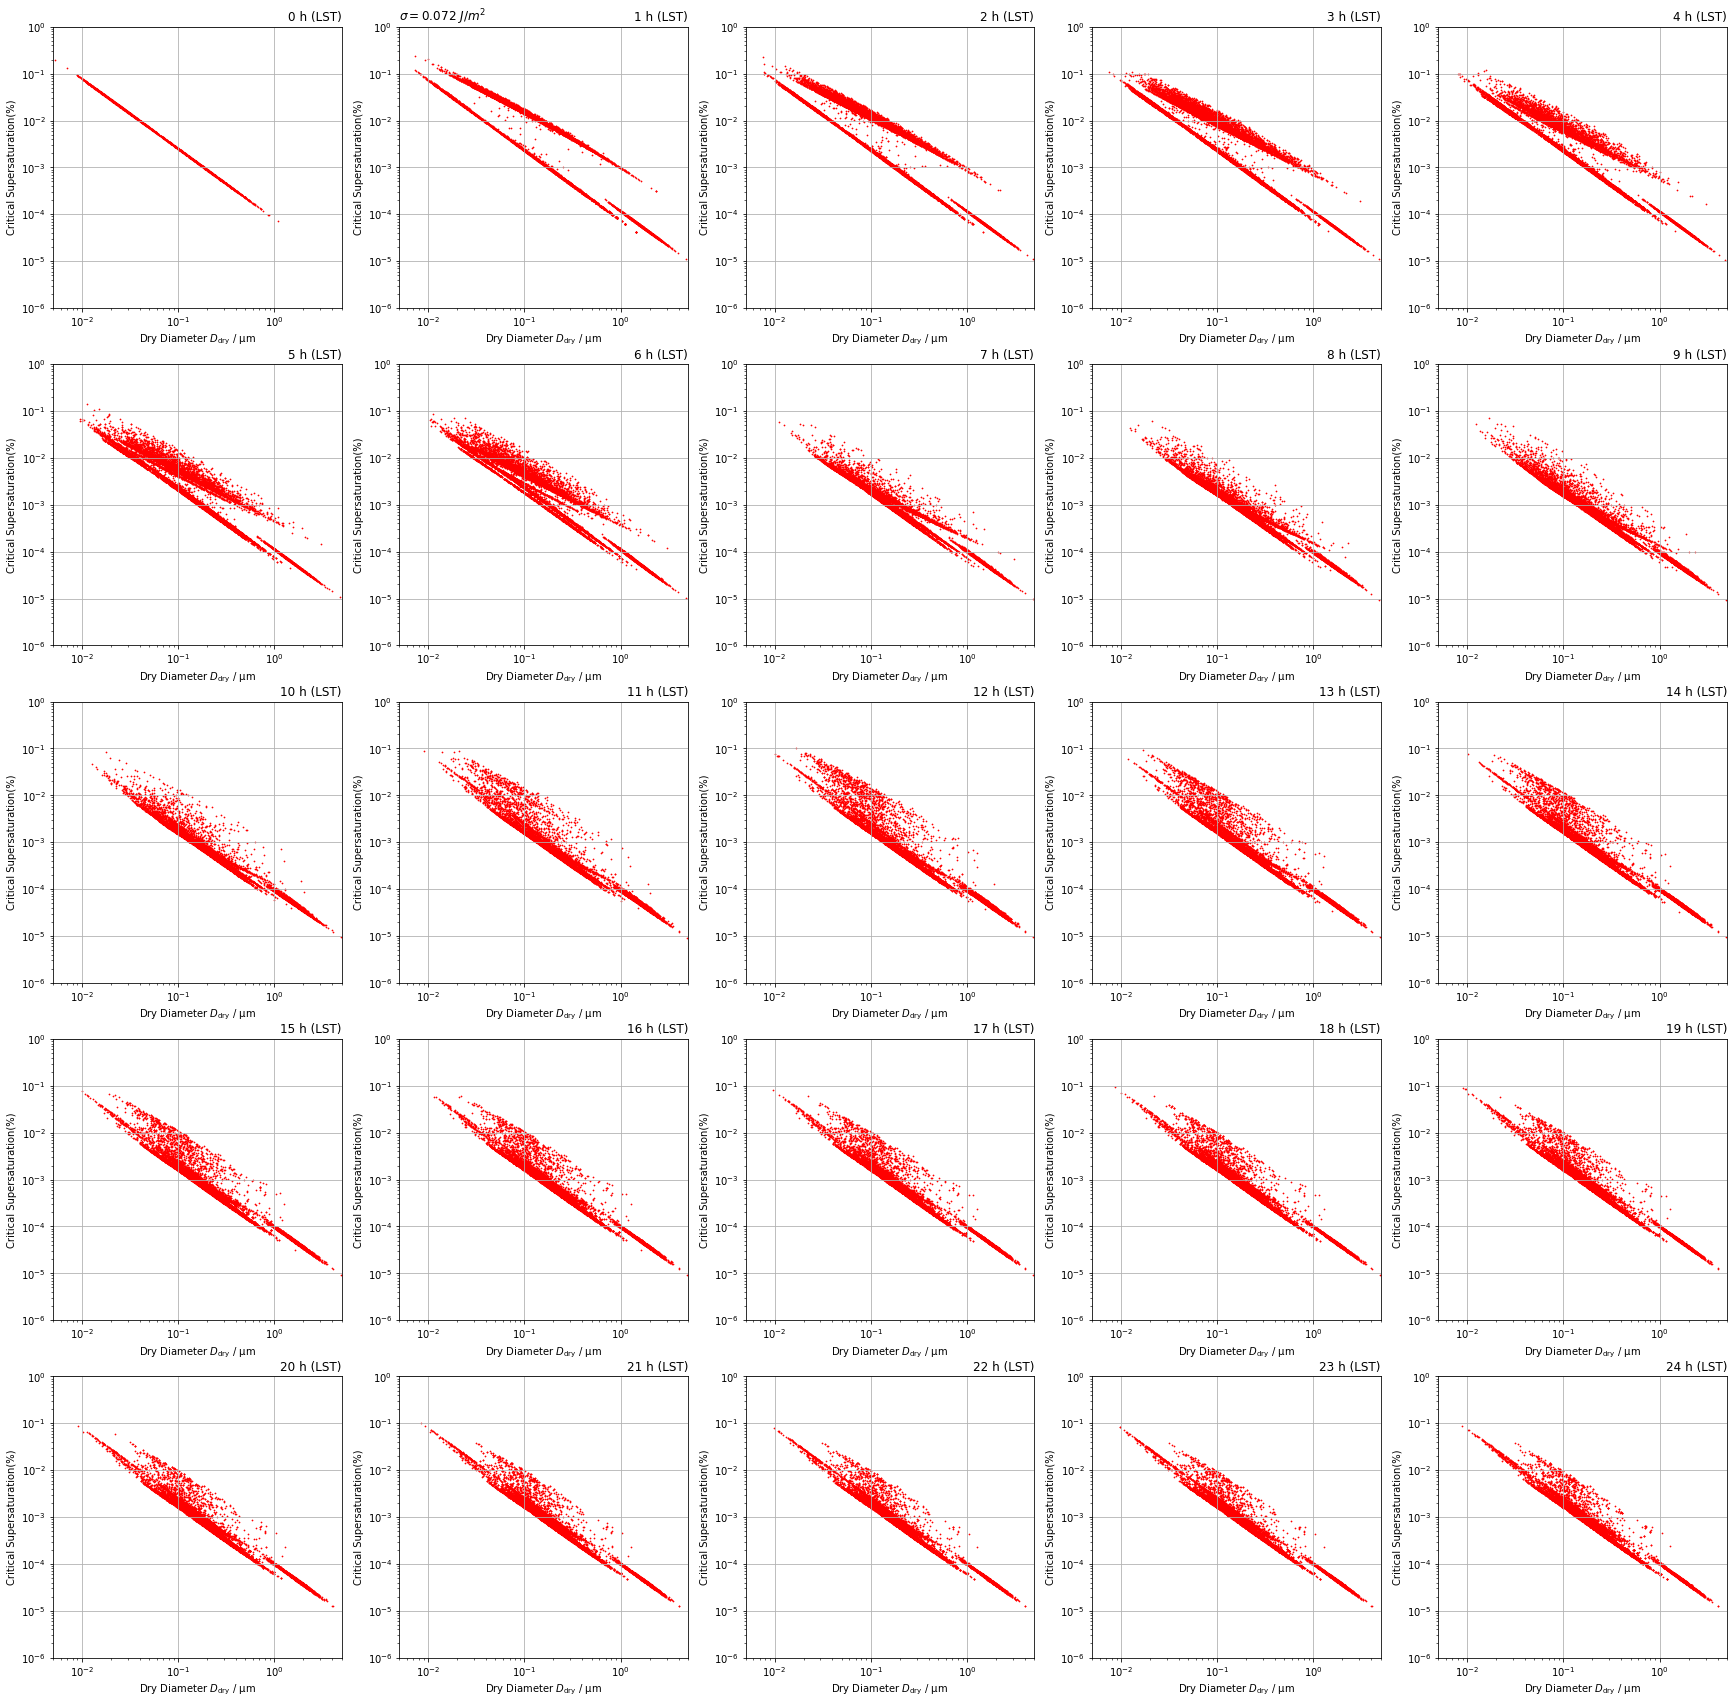

In [40]:
fig1 = plt.figure(figsize=(30,30))
sgm72 = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/do_coagulation"

for subdir, dirs, files in os.walk(sgm72):
    for file in files:
        filename = subdir + os.sep + file
        if ("single_particle_000000" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            scs = f.scs
            num_conc = f.num_con

            ax = plt.subplot(5,5,time_index)
            ax = plt.scatter(dry_diameters * 1e6, scs, s = 2.5, linewidths = 0.1, c='r')
            # ax = plt.hist2d(dry_diameters*1e6, scs, bins=(300, 300), norm = colors.LogNorm(vmin=1e3, vmax=1e5), linewidths = 0.1)
            
            plt.xscale("log")
            plt.xlabel(r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$")
            plt.xlim(5e-3, 5e0)
            plt.yscale("log")
            plt.ylabel(r"Critical Supersaturation(%)")
            plt.ylim(1e-6, 1e0)
            plt.grid(True)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
plt.title("$\sigma = 0.072\ J/m^2$", loc="left")

Text(0.0, 1.0, '$\\sigma = 0.040\\ J/m^2$')

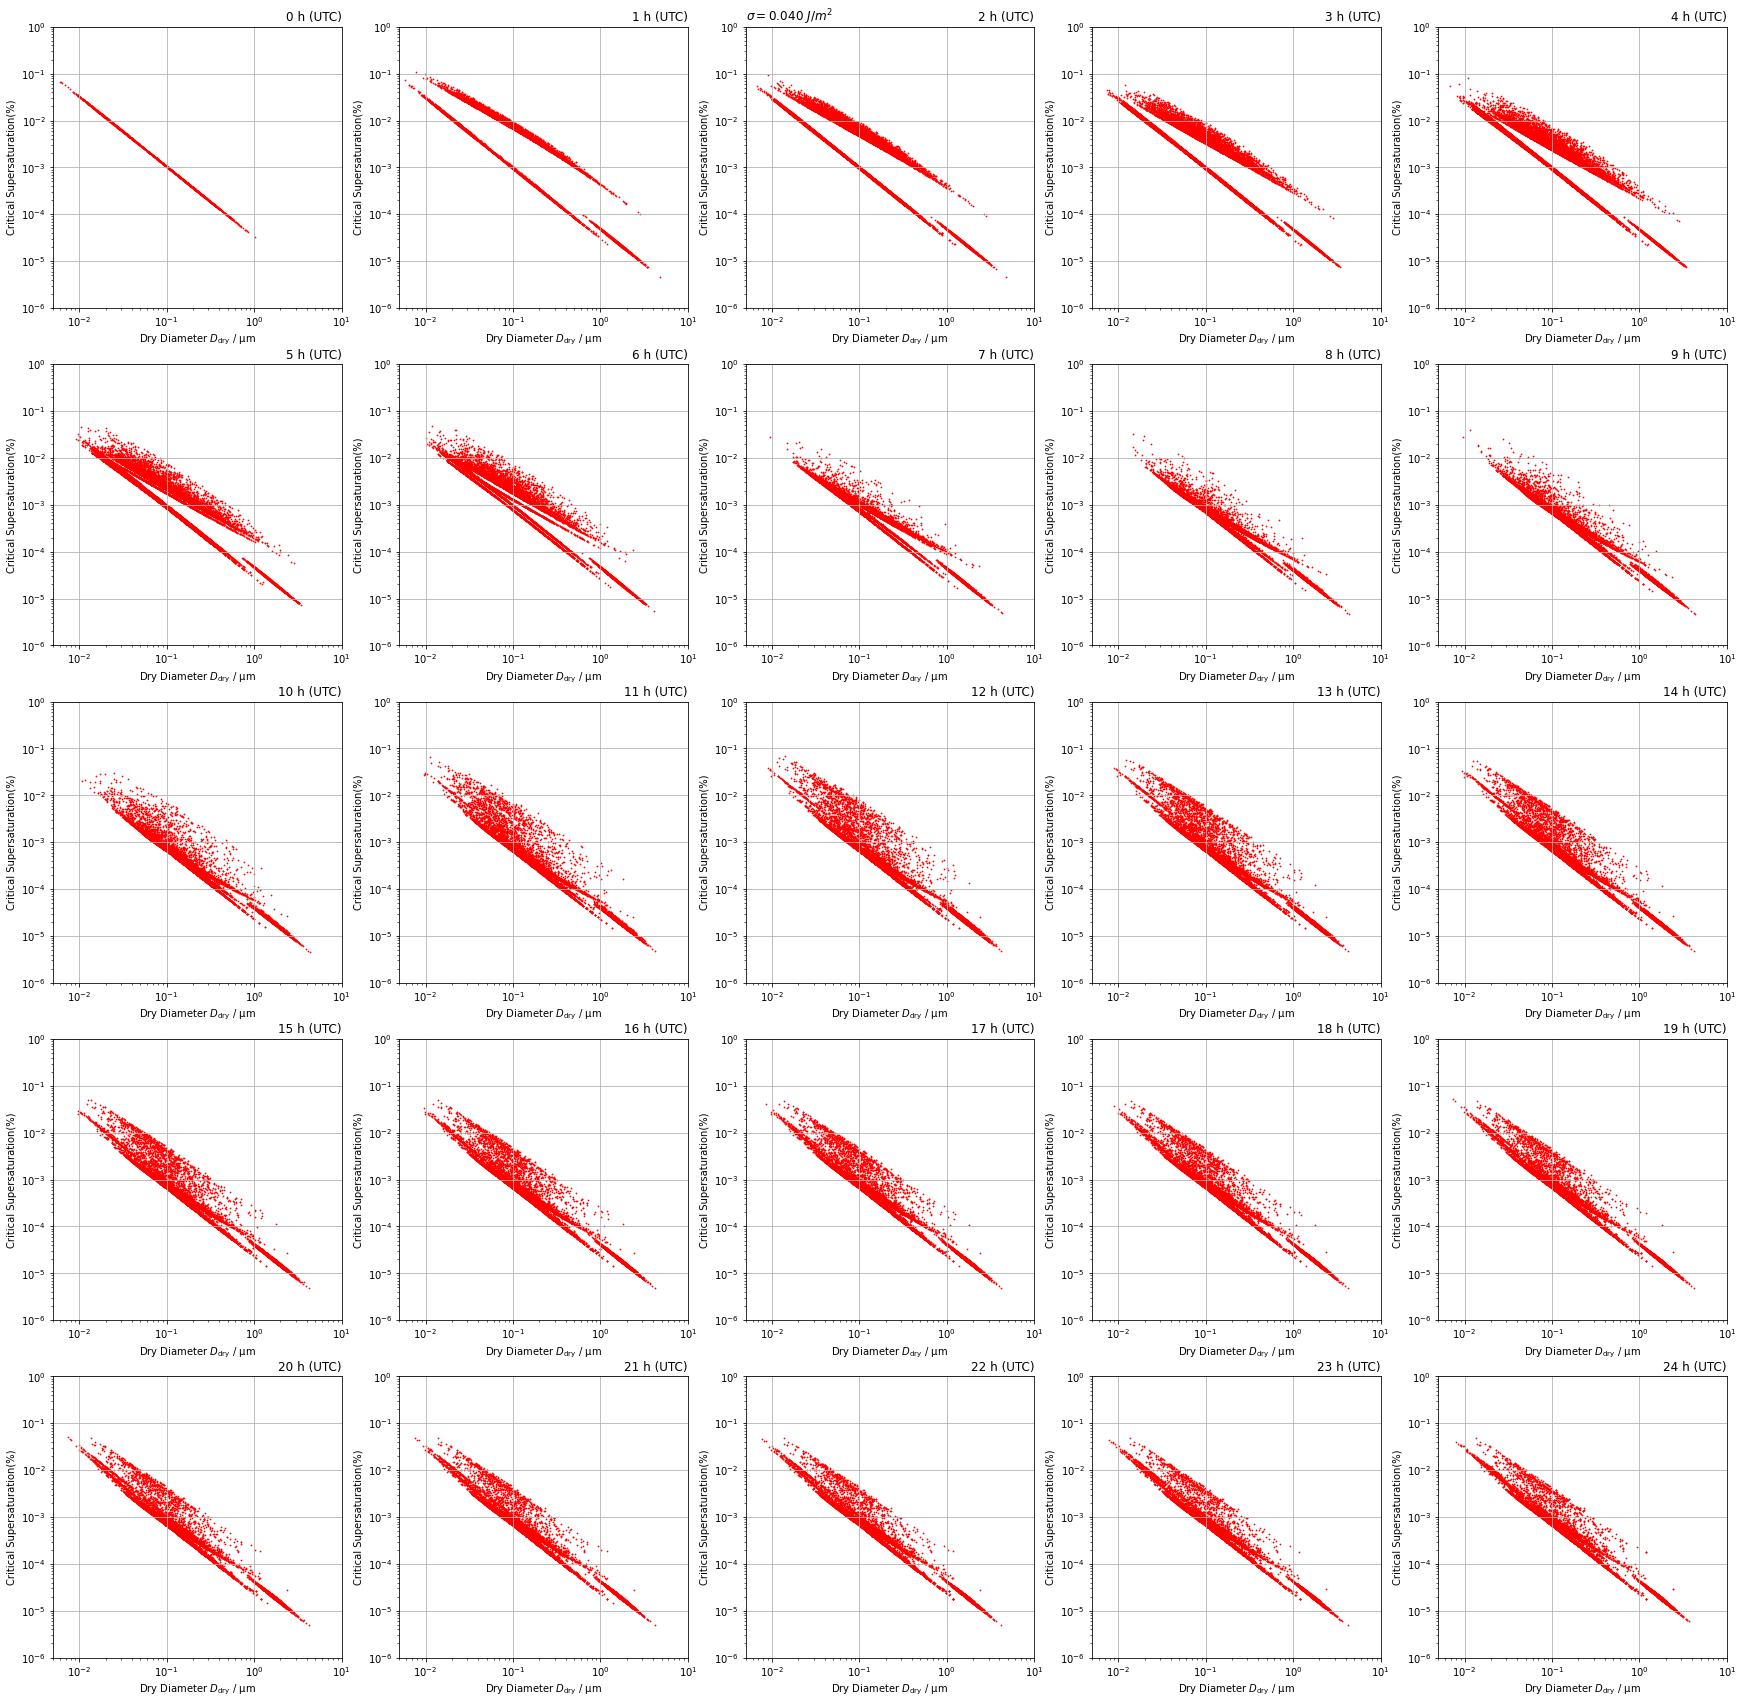

In [41]:
fig2 = plt.figure(figsize=(30,30))
sgm40 = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/sgm40"

for subdir, dirs, files in os.walk(sgm40):
    for file in files:
        filename = subdir + os.sep + file
        if ("single_particle_000000" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            scs = f.scs
            # num_con = f.num_conc

            ax = plt.subplot(5,5,time_index)
            ax = plt.scatter(dry_diameters * 1e6, scs, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.xlabel(r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$")
            plt.xlim(5e-3, 1e1)
            plt.yscale("log")
            plt.ylabel(r"Critical Supersaturation(%)")
            plt.ylim(1e-6, 1e0)
            plt.grid(True)
            utc_time = time_index -1
            plt.title(str(utc_time)+' h (UTC)' , loc='right')
plt.title("$\sigma = 0.040\ J/m^2$", loc='left')

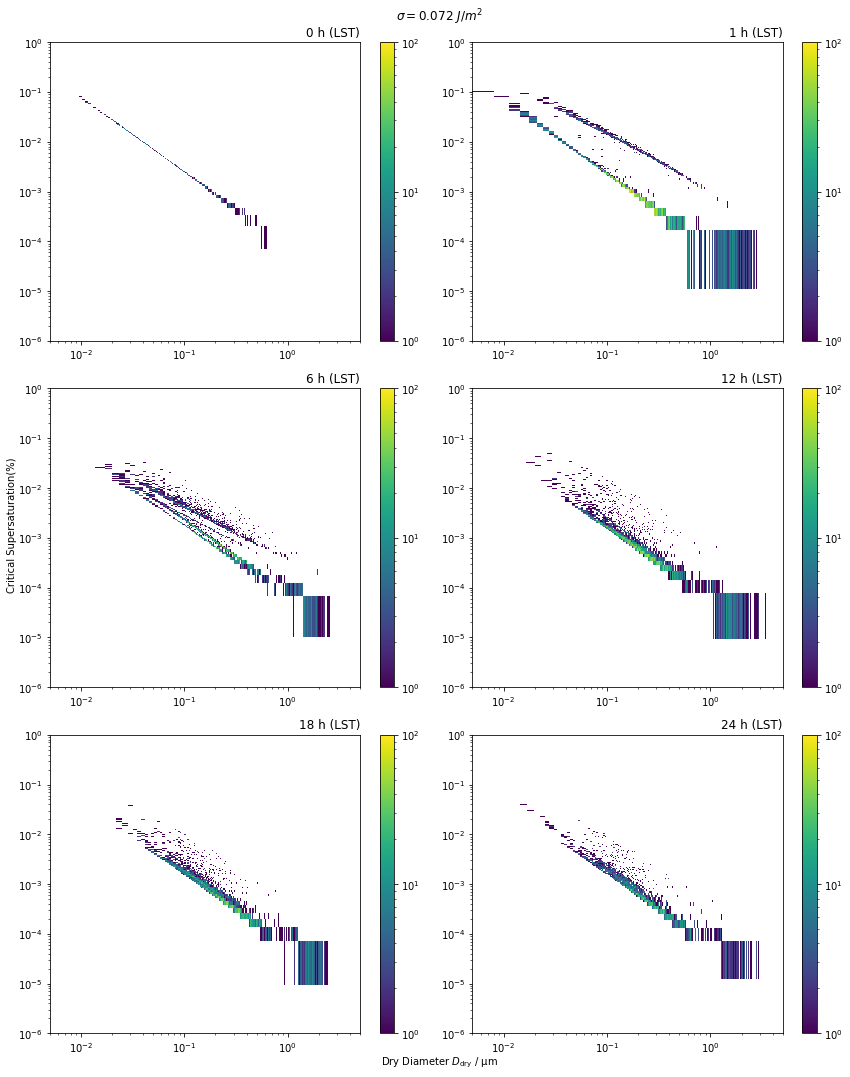

In [67]:
fig1 = plt.figure(figsize=(12,15))
plt.grid(True)
sgm72 = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/do_coagulation"
minimum = 1e0
maximum = 1e2
xbin = 1500
ybin = xbin
for subdir, dirs, files in os.walk(sgm72):
    for file in files:
        filename = subdir + os.sep + file
        # 00
        if ("single_particle_00000001" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f1 = data.T
            f1 = pd.DataFrame(f1)  
            dry_diameters1 = f1.dry_diameters
            scs1 = f1.scs
            num_conc1 = f1.num_con
            ax1 = plt.subplot(3,2,1)
            ax1 = plt.hist2d(dry_diameters1*1e6, scs1, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
        # 01
        if ("single_particle_00000002" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f2 = data.T
            f2 = pd.DataFrame(f2)  
            dry_diameters2 = f2.dry_diameters
            scs2 = f2.scs
            ax2 = plt.subplot(3,2,2)
            ax2 = plt.hist2d(dry_diameters2*1e6, scs2, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
        # 06
        if ("single_particle_00000007" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f3 = data.T
            f3 = pd.DataFrame(f3)  
            dry_diameters3 = f3.dry_diameters
            scs3 = f3.scs
            ax3 = plt.subplot(3,2,3)
            ax3 = plt.hist2d(dry_diameters3*1e6, scs3, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
        # 12
        if ("single_particle_00000013" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f4 = data.T
            f4 = pd.DataFrame(f4)  
            dry_diameters4 = f4.dry_diameters
            scs4 = f4.scs
            ax4 = plt.subplot(3,2,4)
            ax4 = plt.hist2d(dry_diameters4*1e6, scs4, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
        # 18
        if ("single_particle_00000019" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f5 = data.T
            f5 = pd.DataFrame(f5)  
            dry_diameters5 = f5.dry_diameters
            scs5 = f5.scs
            ax5 = plt.subplot(3,2,5)
            ax5 = plt.hist2d(dry_diameters5*1e6, scs5, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
        # 24
        if ("single_particle_00000025" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f6 = data.T
            f6 = pd.DataFrame(f6)  
            dry_diameters6 = f6.dry_diameters
            scs6 = f6.scs
            ax6 = plt.subplot(3,2,6)
            ax6 = plt.hist2d(dry_diameters6*1e6, scs6, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()

fig1.text(0.5, 0, r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$", ha='center')
fig1.text(0, 0.5, r"Critical Supersaturation(%)", va='center', rotation='vertical')
fig1.suptitle("$\sigma = 0.072\ J/m^2$")
plt.tight_layout()

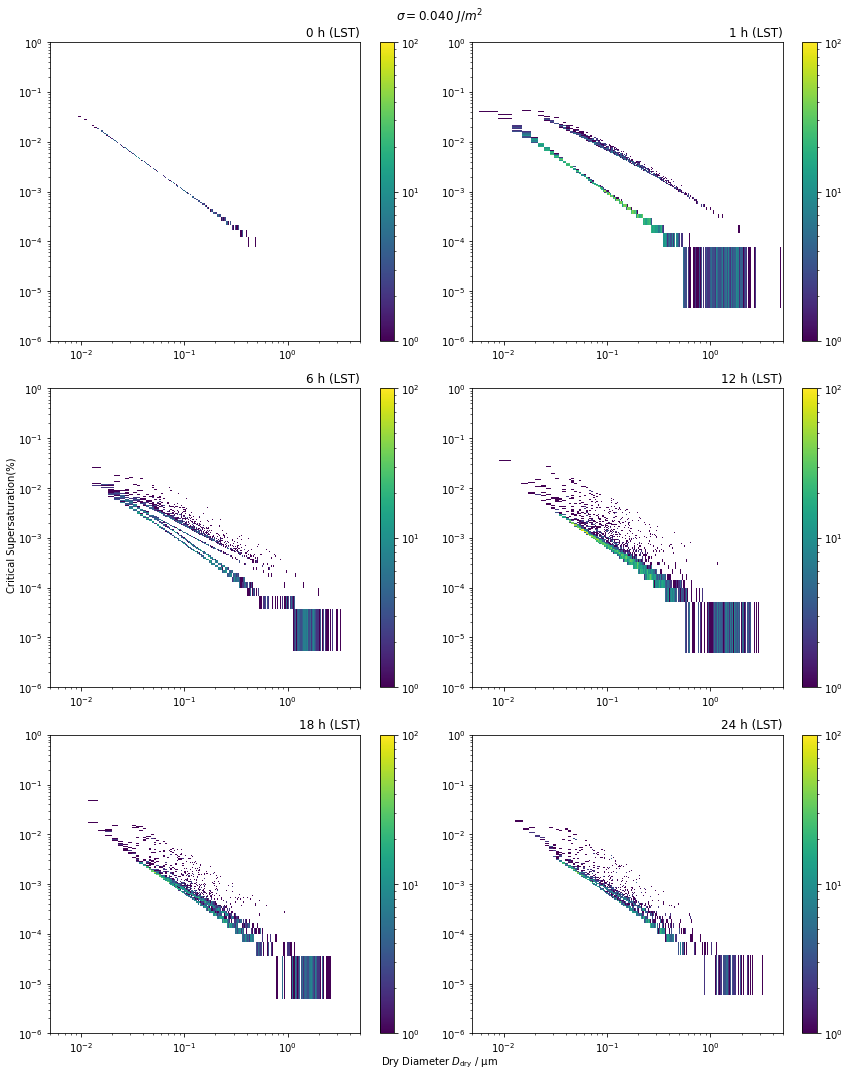

In [68]:
fig2 = plt.figure(figsize=(12,15))
plt.grid(True)
sgm72 = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/sgm40"
minimum = 1e0
maximum = 1e2
xbin = 1500
ybin = xbin
for subdir, dirs, files in os.walk(sgm72):
    for file in files:
        filename = subdir + os.sep + file
        # 00
        if ("single_particle_00000001" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f1 = data.T
            f1 = pd.DataFrame(f1)  
            dry_diameters1 = f1.dry_diameters
            scs1 = f1.scs
            num_conc1 = f1.num_con
            ax1 = plt.subplot(3,2,1)
            ax1 = plt.hist2d(dry_diameters1*1e6, scs1, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
        # 01
        if ("single_particle_00000002" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f2 = data.T
            f2 = pd.DataFrame(f2)  
            dry_diameters2 = f2.dry_diameters
            scs2 = f2.scs
            ax2 = plt.subplot(3,2,2)
            ax2 = plt.hist2d(dry_diameters2*1e6, scs2, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
        # 06
        if ("single_particle_00000007" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f3 = data.T
            f3 = pd.DataFrame(f3)  
            dry_diameters3 = f3.dry_diameters
            scs3 = f3.scs
            ax3 = plt.subplot(3,2,3)
            ax3 = plt.hist2d(dry_diameters3*1e6, scs3, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
        # 12
        if ("single_particle_00000013" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f4 = data.T
            f4 = pd.DataFrame(f4)  
            dry_diameters4 = f4.dry_diameters
            scs4 = f4.scs
            ax4 = plt.subplot(3,2,4)
            ax4 = plt.hist2d(dry_diameters4*1e6, scs4, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
        # 18
        if ("single_particle_00000019" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f5 = data.T
            f5 = pd.DataFrame(f5)  
            dry_diameters5 = f5.dry_diameters
            scs5 = f5.scs
            ax5 = plt.subplot(3,2,5)
            ax5 = plt.hist2d(dry_diameters5*1e6, scs5, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
        # 24
        if ("single_particle_00000025" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f6 = data.T
            f6 = pd.DataFrame(f6)  
            dry_diameters6 = f6.dry_diameters
            scs6 = f6.scs
            ax6 = plt.subplot(3,2,6)
            ax6 = plt.hist2d(dry_diameters6*1e6, scs6, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()

fig2.text(0.5, 0, r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$", ha='center')
fig2.text(0, 0.5, r"Critical Supersaturation(%)", va='center', rotation='vertical')
fig2.suptitle("$\sigma = 0.040\ J/m^2$")
plt.tight_layout()

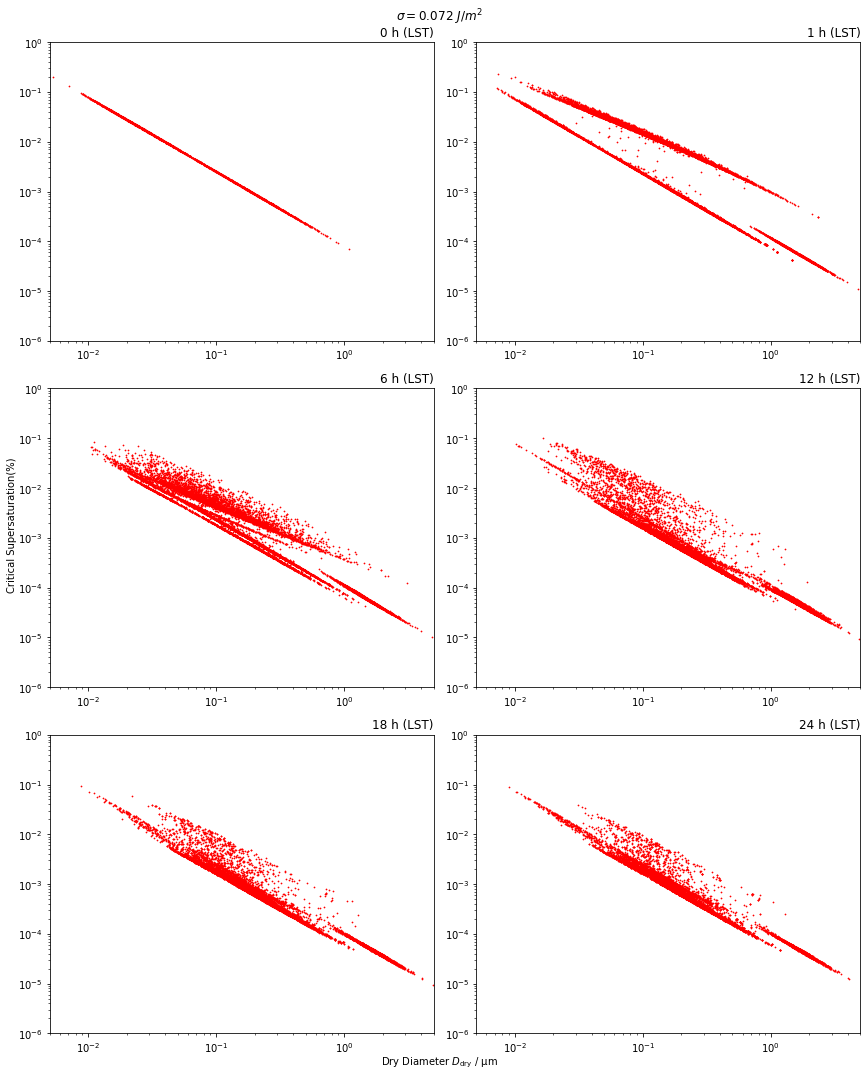

In [69]:
fig = plt.figure(figsize=(12,15))
sgm72 = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/do_coagulation"


for subdir, dirs, files in os.walk(sgm72):
    for file in files:
        filename = subdir + os.sep + file
        # 00
        if ("single_particle_00000001" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f1 = data.T
            f1 = pd.DataFrame(f1)  
            dry_diameters1 = f1.dry_diameters
            scs1 = f1.scs
            num_conc1 = f1.num_con
            ax1 = plt.subplot(3,2,1)
            ax1 = plt.scatter(dry_diameters1 * 1e6, scs1, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
        # 01
        if ("single_particle_00000002" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f2 = data.T
            f2 = pd.DataFrame(f2)  
            dry_diameters2 = f2.dry_diameters
            scs2 = f2.scs
            ax2 = plt.subplot(3,2,2)
            ax = plt.scatter(dry_diameters2 * 1e6, scs2, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
        # 06
        if ("single_particle_00000007" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f3 = data.T
            f3 = pd.DataFrame(f3)  
            dry_diameters3 = f3.dry_diameters
            scs3 = f3.scs
            ax3 = plt.subplot(3,2,3)
            ax3 = plt.scatter(dry_diameters3 * 1e6, scs3, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
        # 12
        if ("single_particle_00000013" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f4 = data.T
            f4 = pd.DataFrame(f4)  
            dry_diameters4 = f4.dry_diameters
            scs4 = f4.scs
            ax4 = plt.subplot(3,2,4)
            ax4 = plt.scatter(dry_diameters4 * 1e6, scs4, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
        # 18
        if ("single_particle_00000019" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f5 = data.T
            f5 = pd.DataFrame(f5)  
            dry_diameters5 = f5.dry_diameters
            scs5 = f5.scs
            ax5 = plt.subplot(3,2,5)
            ax5 = plt.scatter(dry_diameters5 * 1e6, scs5, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')  
        # 24
        if ("single_particle_00000025" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f6 = data.T
            f6 = pd.DataFrame(f6)  
            dry_diameters6 = f6.dry_diameters
            scs6 = f6.scs
            ax6 = plt.subplot(3,2,6)
            ax6 = plt.scatter(dry_diameters6 * 1e6, scs6, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')


fig5.suptitle("$\sigma = 0.072\ J/m^2$")
fig5.text(0.5, 0, r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$", ha='center')
fig5.text(0, 0.5, r"Critical Supersaturation(%)", va='center', rotation='vertical')
plt.tight_layout()

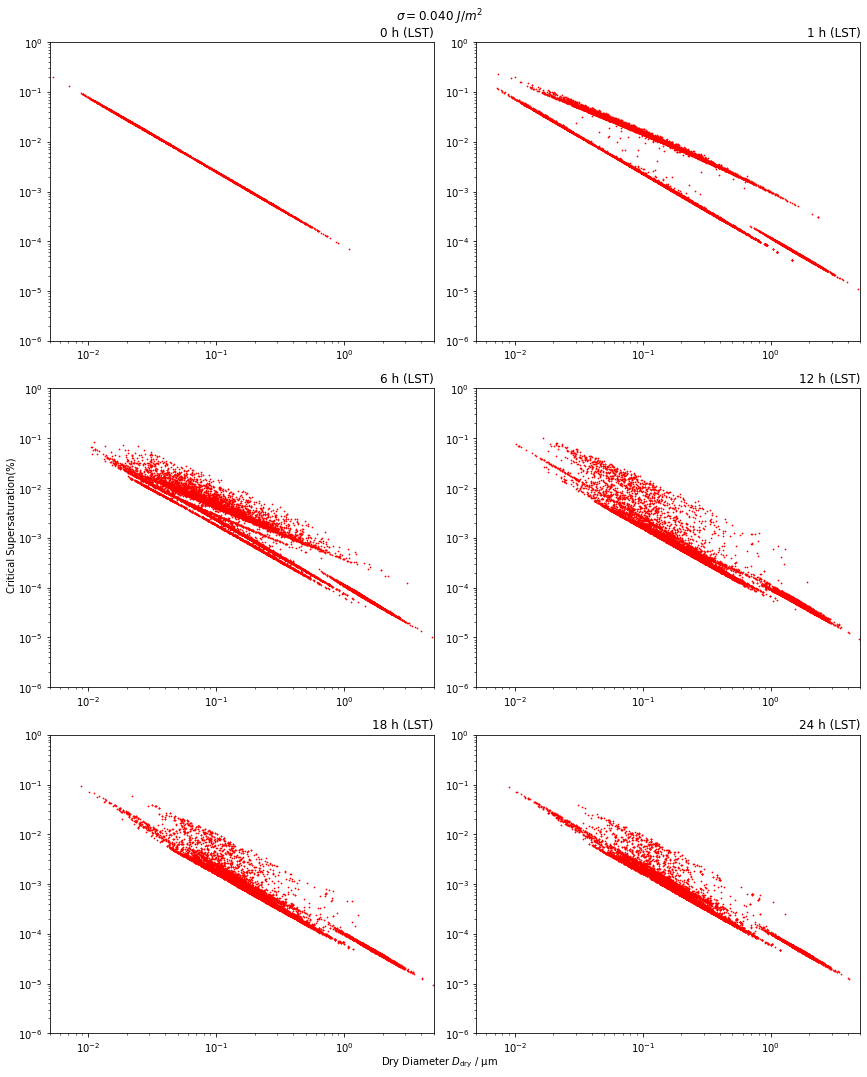

In [70]:
fig6 = plt.figure(figsize=(12,15))
sgm40 = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/sgm40"

for subdir, dirs, files in os.walk(sgm72):
    for file in files:
        filename = subdir + os.sep + file
            
        # 00
        if ("single_particle_00000001" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f1 = data.T
            f1 = pd.DataFrame(f1)  
            dry_diameters1 = f1.dry_diameters
            scs1 = f1.scs
            num_conc1 = f1.num_con
            ax1 = plt.subplot(3,2,1)
            ax = plt.scatter(dry_diameters1 * 1e6, scs1, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
        # 01
        if ("single_particle_00000002" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f2 = data.T
            f2 = pd.DataFrame(f2)  
            dry_diameters2 = f2.dry_diameters
            scs2 = f2.scs
            ax2 = plt.subplot(3,2,2)
            ax = plt.scatter(dry_diameters2 * 1e6, scs2, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
        # 06
        if ("single_particle_00000007" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f3 = data.T
            f3 = pd.DataFrame(f3)  
            dry_diameters3 = f3.dry_diameters
            scs3 = f3.scs
            ax3 = plt.subplot(3,2,3)
            ax3 = plt.scatter(dry_diameters3 * 1e6, scs3, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
        # 12
        if ("single_particle_00000013" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f4 = data.T
            f4 = pd.DataFrame(f4)  
            dry_diameters4 = f4.dry_diameters
            scs4 = f4.scs
            ax4 = plt.subplot(3,2,4)
            ax4 = plt.scatter(dry_diameters4 * 1e6, scs4, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
        # 18
        if ("single_particle_00000019" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f5 = data.T
            f5 = pd.DataFrame(f5)  
            dry_diameters5 = f5.dry_diameters
            scs5 = f5.scs
            ax5 = plt.subplot(3,2,5)
            ax5 = plt.scatter(dry_diameters5 * 1e6, scs5, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
        # 24
        if ("single_particle_00000025" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f6 = data.T
            f6 = pd.DataFrame(f6)  
            dry_diameters6 = f6.dry_diameters
            scs6 = f6.scs
            ax6 = plt.subplot(3,2,6)
            ax6 = plt.scatter(dry_diameters6 * 1e6, scs6, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')

fig6.suptitle("$\sigma = 0.040\ J/m^2$")
fig6.text(0.5, 0, r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$", ha='center')
fig6.text(0, 0.5, r"Critical Supersaturation(%)", va='center', rotation='vertical')
plt.tight_layout()

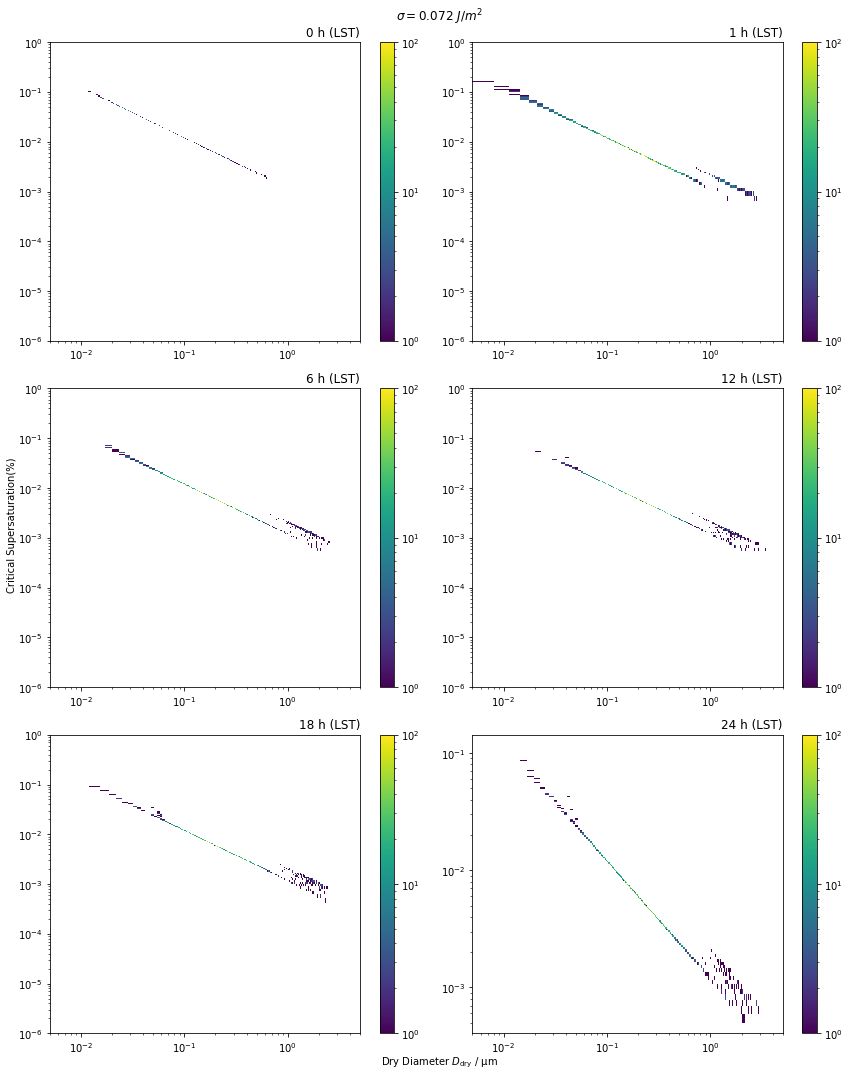

In [76]:
fig_scs_sgm = plt.figure(figsize=(12,15))
directory = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/do_coagulation"
minimum = 1e0
maximum = 1e2
xbin = 1500
ybin = xbin

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        # 00
        if ("single_particle_00000001" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss = np.exp((4*sgm*1e-3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters))-1
            
            ax1 = plt.subplot(3,2,1)
            ax1 = plt.hist2d(dry_diameters*1e6, crit_ss, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
            # 01
        if ("single_particle_00000002" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss = np.exp((4*sgm*1e-3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters))-1
            
            ax2 = plt.subplot(3,2,2)
            ax2 = plt.hist2d(dry_diameters*1e6, crit_ss, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
            # 06
        if ("single_particle_00000007" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss = np.exp((4*sgm*1e-3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters))-1
            
            ax3 = plt.subplot(3,2,3)
            ax3 = plt.hist2d(dry_diameters*1e6, crit_ss, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
            # 12
        if ("single_particle_00000013" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss = np.exp((4*sgm*1e-3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters))-1
            
            ax4 = plt.subplot(3,2,4)
            ax4 = plt.hist2d(dry_diameters*1e6, crit_ss, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
            # 18
        if ("single_particle_00000019" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss = np.exp((4*sgm*1e-3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters))-1
            
            ax5 = plt.subplot(3,2,5)
            ax5 = plt.hist2d(dry_diameters*1e6, crit_ss, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
            # 24
        if ("single_particle_00000025" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss = np.exp((4*sgm*1e-3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters))-1
            
            ax6 = plt.subplot(3,2,6)
            ax6 = plt.hist2d(dry_diameters*1e6, crit_ss, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            # plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()

fig_scs_sgm.suptitle("$\sigma = 0.072\ J/m^2$")
fig_scs_sgm.text(0.5, 0, r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$", ha='center')
fig_scs_sgm.text(0, 0.5, r"Critical Supersaturation(%)", va='center', rotation='vertical')
plt.tight_layout()


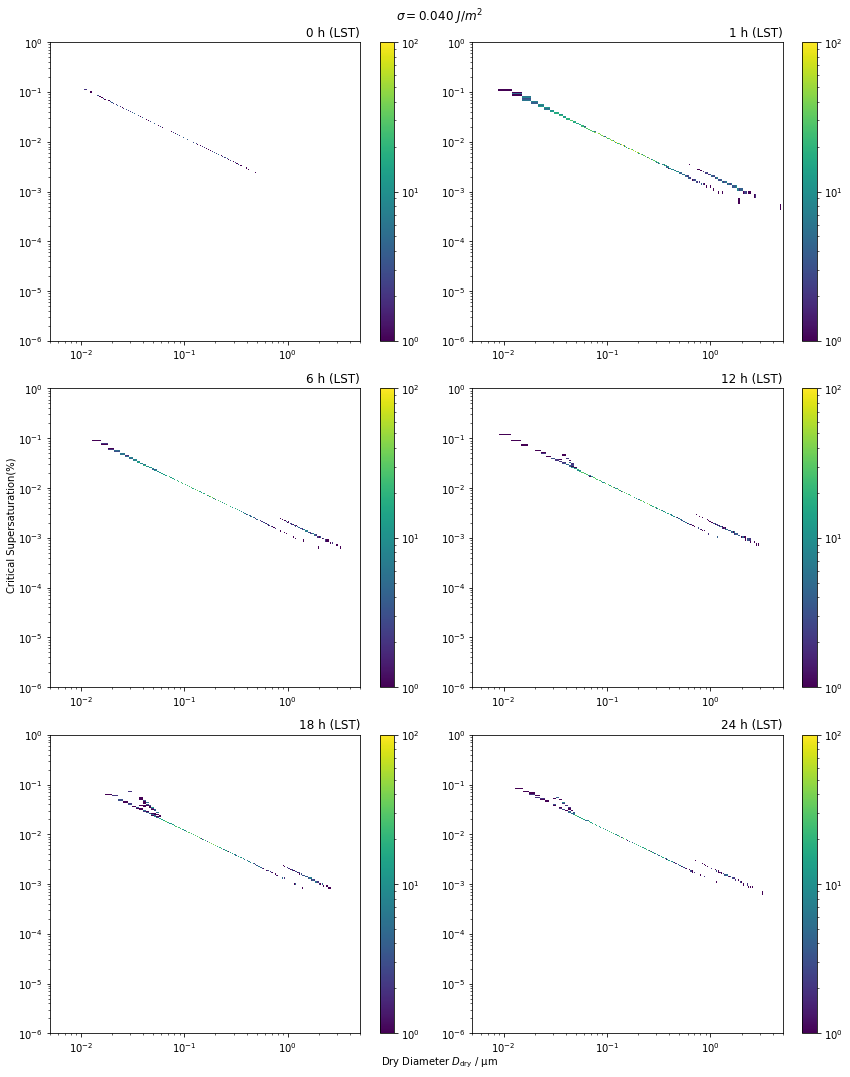

In [75]:
fig_scs_sgm = plt.figure(figsize=(12,15))
directory = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/sgm40"
minimum = 1e0
maximum = 1e2
xbin = 1500
ybin = xbin

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        # 00
        if ("single_particle_00000001" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss = np.exp((4*sgm*1e-3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters))-1
            
            ax1 = plt.subplot(3,2,1)
            ax1 = plt.hist2d(dry_diameters*1e6, crit_ss, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
            # 01
        if ("single_particle_00000002" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss = np.exp((4*sgm*1e-3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters))-1
            
            ax2 = plt.subplot(3,2,2)
            ax2 = plt.hist2d(dry_diameters*1e6, crit_ss, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
            # 06
        if ("single_particle_00000007" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss = np.exp((4*sgm*1e-3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters))-1
            
            ax3 = plt.subplot(3,2,3)
            ax3 = plt.hist2d(dry_diameters*1e6, crit_ss, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
            # 12
        if ("single_particle_00000013" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss = np.exp((4*sgm*1e-3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters))-1
            
            ax4 = plt.subplot(3,2,4)
            ax4 = plt.hist2d(dry_diameters*1e6, crit_ss, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
            # 18
        if ("single_particle_00000019" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss = np.exp((4*sgm*1e-3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters))-1
            
            ax5 = plt.subplot(3,2,5)
            ax5 = plt.hist2d(dry_diameters*1e6, crit_ss, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()
            # 24
        if ("single_particle_00000025" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss = np.exp((4*sgm*1e-3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters))-1
            
            ax6 = plt.subplot(3,2,6)
            ax6 = plt.hist2d(dry_diameters*1e6, crit_ss, bins=(xbin, ybin), norm = colors.LogNorm(vmin=minimum, vmax=maximum))
            plt.xscale("log")
            plt.yscale("log")
            plt.xlim(5e-3, 5e0)
            plt.ylim(1e-6, 1e0)
            LST_time = time_index -1
            plt.title(str(LST_time)+' h (LST)' , loc='right')
            plt.colorbar()

fig_scs_sgm.suptitle("$\sigma = 0.040\ J/m^2$")
fig_scs_sgm.text(0.5, 0, r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$", ha='center')
fig_scs_sgm.text(0, 0.5, r"Critical Supersaturation(%)", va='center', rotation='vertical')
plt.tight_layout()
